In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [3]:
import pytorch_optimizer as optim

In [4]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [5]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [6]:
CIFAR_train = torchvision.datasets.CIFAR100('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR100('./', download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [7]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [8]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(19) tensor(29) tensor(0) tensor(11) tensor(1) tensor(86) tensor(90) tensor(28) tensor(23) tensor(31) 

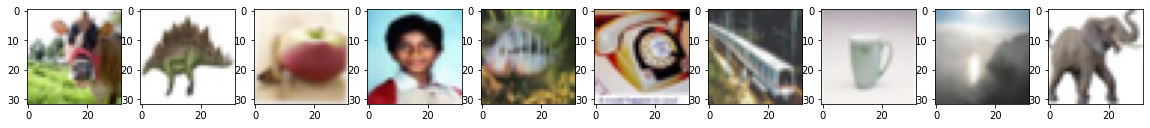

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [10]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [11]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [12]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [32]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters(), lr=0.001)
    #optimizer = optim.AdaBelief(net.parameters())
    #optimizer = optim.DiffGrad(net.parameters())
    optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        


        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")
    del net
    return test_accuracy_history, test_loss_history



In [13]:
accuracies = {}
losses = {}

In [18]:
from torchvision.models import googlenet, GoogLeNet_Weights
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

In [21]:
accuracies['googlenet+SGD'], losses['googlenet+SGD'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:11<00:00, 21.61it/s]


accuracy =  0.34119999408721924



epoch  1


100%|██████████| 250/250 [00:11<00:00, 21.54it/s]


accuracy =  0.4072999954223633



epoch  2


100%|██████████| 250/250 [00:11<00:00, 21.03it/s]


accuracy =  0.4380999803543091



epoch  3


100%|██████████| 250/250 [00:11<00:00, 21.00it/s]


accuracy =  0.46050000190734863



epoch  4


100%|██████████| 250/250 [00:11<00:00, 21.10it/s]


accuracy =  0.4619999825954437



epoch  5


100%|██████████| 250/250 [00:11<00:00, 21.15it/s]


accuracy =  0.4786999821662903



epoch  6


100%|██████████| 250/250 [00:11<00:00, 21.27it/s]


accuracy =  0.4777999818325043



epoch  7


100%|██████████| 250/250 [00:11<00:00, 21.16it/s]


accuracy =  0.4770999848842621



epoch  8


100%|██████████| 250/250 [00:11<00:00, 20.90it/s]


accuracy =  0.47829997539520264



epoch  9


100%|██████████| 250/250 [00:11<00:00, 21.10it/s]


accuracy =  0.48799997568130493



epoch  10


100%|██████████| 250/250 [00:11<00:00, 20.88it/s]


accuracy =  0.4813999831676483



epoch  11


100%|██████████| 250/250 [00:11<00:00, 21.05it/s]


accuracy =  0.4870999753475189



epoch  12


100%|██████████| 250/250 [00:11<00:00, 21.13it/s]


accuracy =  0.493399977684021



epoch  13


100%|██████████| 250/250 [00:11<00:00, 21.18it/s]


accuracy =  0.49399998784065247



epoch  14


100%|██████████| 250/250 [00:11<00:00, 21.83it/s]


accuracy =  0.49459999799728394



epoch  15


100%|██████████| 250/250 [00:11<00:00, 21.50it/s]


accuracy =  0.4887000024318695



epoch  16


100%|██████████| 250/250 [00:11<00:00, 21.03it/s]


accuracy =  0.498199999332428



epoch  17


100%|██████████| 250/250 [00:11<00:00, 21.09it/s]


accuracy =  0.5029000043869019



epoch  18


100%|██████████| 250/250 [00:11<00:00, 21.01it/s]


accuracy =  0.4908999800682068



epoch  19


100%|██████████| 250/250 [00:11<00:00, 21.21it/s]


accuracy =  0.49300000071525574





In [23]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+Adam'], losses['googlenet+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:14<00:00, 17.36it/s]


accuracy =  0.3886999785900116



epoch  1


100%|██████████| 250/250 [00:14<00:00, 17.63it/s]


accuracy =  0.457099974155426



epoch  2


100%|██████████| 250/250 [00:14<00:00, 16.80it/s]


accuracy =  0.48009997606277466



epoch  3


100%|██████████| 250/250 [00:14<00:00, 17.52it/s]


accuracy =  0.4827999770641327



epoch  4


100%|██████████| 250/250 [00:14<00:00, 17.60it/s]


accuracy =  0.5015999674797058



epoch  5


100%|██████████| 250/250 [00:14<00:00, 17.45it/s]


accuracy =  0.5187999606132507



epoch  6


100%|██████████| 250/250 [00:14<00:00, 17.39it/s]


accuracy =  0.5133000016212463



epoch  7


100%|██████████| 250/250 [00:15<00:00, 16.65it/s]


accuracy =  0.5074999928474426



epoch  8


100%|██████████| 250/250 [00:14<00:00, 17.37it/s]


accuracy =  0.49869999289512634



epoch  9


100%|██████████| 250/250 [00:14<00:00, 17.42it/s]


accuracy =  0.5214999914169312



epoch  10


100%|██████████| 250/250 [00:14<00:00, 17.58it/s]


accuracy =  0.5134999752044678



epoch  11


100%|██████████| 250/250 [00:14<00:00, 17.49it/s]


accuracy =  0.5157999992370605



epoch  12


100%|██████████| 250/250 [00:14<00:00, 17.67it/s]


accuracy =  0.5291000008583069



epoch  13


100%|██████████| 250/250 [00:14<00:00, 17.24it/s]


accuracy =  0.5282999873161316



epoch  14


100%|██████████| 250/250 [00:14<00:00, 17.30it/s]


accuracy =  0.5077999830245972



epoch  15


100%|██████████| 250/250 [00:14<00:00, 16.76it/s]


accuracy =  0.5177000164985657



epoch  16


100%|██████████| 250/250 [00:14<00:00, 17.60it/s]


accuracy =  0.5338000059127808



epoch  17


100%|██████████| 250/250 [00:14<00:00, 17.49it/s]


accuracy =  0.5300999879837036



epoch  18


100%|██████████| 250/250 [00:14<00:00, 17.52it/s]


accuracy =  0.5338999629020691



epoch  19


100%|██████████| 250/250 [00:14<00:00, 17.38it/s]


accuracy =  0.5266000032424927





In [25]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+PNMBelief'], losses['googlenet+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:16<00:00, 14.72it/s]


accuracy =  0.3813999891281128



epoch  1


100%|██████████| 250/250 [00:16<00:00, 14.94it/s]


accuracy =  0.46789997816085815



epoch  2


100%|██████████| 250/250 [00:17<00:00, 14.24it/s]


accuracy =  0.502299964427948



epoch  3


100%|██████████| 250/250 [00:17<00:00, 14.26it/s]


accuracy =  0.5123000144958496



epoch  4


100%|██████████| 250/250 [00:16<00:00, 14.87it/s]


accuracy =  0.5090999603271484



epoch  5


100%|██████████| 250/250 [00:17<00:00, 14.13it/s]


accuracy =  0.515500009059906



epoch  6


100%|██████████| 250/250 [00:16<00:00, 14.91it/s]


accuracy =  0.5141000151634216



epoch  7


100%|██████████| 250/250 [00:16<00:00, 14.77it/s]


accuracy =  0.5173999667167664



epoch  8


100%|██████████| 250/250 [00:17<00:00, 14.06it/s]


accuracy =  0.5231999754905701



epoch  9


100%|██████████| 250/250 [00:16<00:00, 14.83it/s]


accuracy =  0.5216999650001526



epoch  10


100%|██████████| 250/250 [00:16<00:00, 14.85it/s]


accuracy =  0.5184999704360962



epoch  11


100%|██████████| 250/250 [00:17<00:00, 14.07it/s]


accuracy =  0.5199999809265137



epoch  12


100%|██████████| 250/250 [00:16<00:00, 14.93it/s]


accuracy =  0.5273999571800232



epoch  13


100%|██████████| 250/250 [00:18<00:00, 13.21it/s]


accuracy =  0.5288000106811523



epoch  14


100%|██████████| 250/250 [00:19<00:00, 13.14it/s]


accuracy =  0.5169000029563904



epoch  15


100%|██████████| 250/250 [00:16<00:00, 14.86it/s]


accuracy =  0.5309000015258789



epoch  16


100%|██████████| 250/250 [00:17<00:00, 14.31it/s]


accuracy =  0.5284000039100647



epoch  17


100%|██████████| 250/250 [00:17<00:00, 14.50it/s]


accuracy =  0.5292999744415283



epoch  18


100%|██████████| 250/250 [00:17<00:00, 14.69it/s]


accuracy =  0.5291000008583069



epoch  19


100%|██████████| 250/250 [00:17<00:00, 14.49it/s]


accuracy =  0.5361999869346619





In [27]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+YogiPNM'], losses['googlenet+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:17<00:00, 14.32it/s]


accuracy =  0.38989999890327454



epoch  1


100%|██████████| 250/250 [00:16<00:00, 14.74it/s]


accuracy =  0.4626999795436859



epoch  2


100%|██████████| 250/250 [00:17<00:00, 14.07it/s]


accuracy =  0.491599977016449



epoch  3


100%|██████████| 250/250 [00:16<00:00, 14.72it/s]


accuracy =  0.505299985408783



epoch  4


100%|██████████| 250/250 [00:17<00:00, 14.52it/s]


accuracy =  0.5022000074386597



epoch  5


100%|██████████| 250/250 [00:17<00:00, 14.11it/s]


accuracy =  0.49729999899864197



epoch  6


100%|██████████| 250/250 [00:17<00:00, 14.53it/s]


accuracy =  0.5138999819755554



epoch  7


100%|██████████| 250/250 [00:17<00:00, 14.30it/s]


accuracy =  0.5134999752044678



epoch  8


100%|██████████| 250/250 [00:17<00:00, 14.25it/s]


accuracy =  0.5117999911308289



epoch  9


100%|██████████| 250/250 [00:20<00:00, 12.35it/s]


accuracy =  0.5123999714851379



epoch  10


100%|██████████| 250/250 [00:18<00:00, 13.80it/s]


accuracy =  0.5174999833106995



epoch  11


100%|██████████| 250/250 [00:17<00:00, 14.52it/s]


accuracy =  0.5185999870300293



epoch  12


100%|██████████| 250/250 [00:17<00:00, 14.05it/s]


accuracy =  0.5200999975204468



epoch  13


100%|██████████| 250/250 [00:17<00:00, 14.40it/s]


accuracy =  0.5281999707221985



epoch  14


100%|██████████| 250/250 [00:17<00:00, 14.29it/s]


accuracy =  0.5148000121116638



epoch  15


100%|██████████| 250/250 [00:17<00:00, 13.92it/s]


accuracy =  0.5187999606132507



epoch  16


100%|██████████| 250/250 [00:17<00:00, 14.61it/s]


accuracy =  0.5110999941825867



epoch  17


100%|██████████| 250/250 [00:17<00:00, 14.44it/s]


accuracy =  0.5275999903678894



epoch  18


100%|██████████| 250/250 [00:18<00:00, 13.83it/s]


accuracy =  0.5270999670028687



epoch  19


100%|██████████| 250/250 [00:17<00:00, 14.47it/s]


accuracy =  0.5293999910354614





In [29]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+AdaBelief'], losses['googlenet+AdaBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:15<00:00, 15.94it/s]


accuracy =  0.28279998898506165



epoch  1


100%|██████████| 250/250 [00:16<00:00, 15.06it/s]


accuracy =  0.42319998145103455



epoch  2


100%|██████████| 250/250 [00:16<00:00, 15.58it/s]


accuracy =  0.47079998254776



epoch  3


100%|██████████| 250/250 [00:15<00:00, 15.88it/s]


accuracy =  0.4795999825000763



epoch  4


100%|██████████| 250/250 [00:15<00:00, 15.74it/s]


accuracy =  0.4869000017642975



epoch  5


100%|██████████| 250/250 [00:16<00:00, 14.77it/s]


accuracy =  0.492499977350235



epoch  6


100%|██████████| 250/250 [00:18<00:00, 13.82it/s]


accuracy =  0.5131999850273132



epoch  7


100%|██████████| 250/250 [00:15<00:00, 15.72it/s]


accuracy =  0.5112999677658081



epoch  8


100%|██████████| 250/250 [00:16<00:00, 15.49it/s]


accuracy =  0.5101999640464783



epoch  9


100%|██████████| 250/250 [00:16<00:00, 15.21it/s]


accuracy =  0.5038999915122986



epoch  10


100%|██████████| 250/250 [00:15<00:00, 15.68it/s]


accuracy =  0.5138999819755554



epoch  11


100%|██████████| 250/250 [00:15<00:00, 15.70it/s]


accuracy =  0.5238000154495239



epoch  12


100%|██████████| 250/250 [00:16<00:00, 15.19it/s]


accuracy =  0.5103999972343445



epoch  13


100%|██████████| 250/250 [00:16<00:00, 15.34it/s]


accuracy =  0.5205999612808228



epoch  14


100%|██████████| 250/250 [00:15<00:00, 15.79it/s]


accuracy =  0.5134999752044678



epoch  15


100%|██████████| 250/250 [00:15<00:00, 15.86it/s]


accuracy =  0.517300009727478



epoch  16


100%|██████████| 250/250 [00:16<00:00, 15.36it/s]


accuracy =  0.51910001039505



epoch  17


100%|██████████| 250/250 [00:16<00:00, 15.27it/s]


accuracy =  0.5108999609947205



epoch  18


100%|██████████| 250/250 [00:15<00:00, 15.87it/s]


accuracy =  0.5288999676704407



epoch  19


100%|██████████| 250/250 [00:15<00:00, 15.66it/s]


accuracy =  0.5234000086784363





In [31]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+DiffGrad'], losses['googlenet+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:19<00:00, 12.83it/s]


accuracy =  0.3879999816417694



epoch  1


100%|██████████| 250/250 [00:18<00:00, 13.74it/s]


accuracy =  0.46789997816085815



epoch  2


100%|██████████| 250/250 [00:19<00:00, 13.00it/s]


accuracy =  0.4957999885082245



epoch  3


100%|██████████| 250/250 [00:18<00:00, 13.68it/s]


accuracy =  0.5073999762535095



epoch  4


100%|██████████| 250/250 [00:18<00:00, 13.50it/s]


accuracy =  0.5163999795913696



epoch  5


100%|██████████| 250/250 [00:18<00:00, 13.54it/s]


accuracy =  0.5141000151634216



epoch  6


100%|██████████| 250/250 [00:18<00:00, 13.81it/s]


accuracy =  0.5090999603271484



epoch  7


100%|██████████| 250/250 [00:19<00:00, 13.14it/s]


accuracy =  0.5163999795913696



epoch  8


100%|██████████| 250/250 [00:18<00:00, 13.74it/s]


accuracy =  0.5235999822616577



epoch  9


100%|██████████| 250/250 [00:19<00:00, 12.85it/s]


accuracy =  0.5194999575614929



epoch  10


100%|██████████| 250/250 [00:18<00:00, 13.72it/s]


accuracy =  0.5101999640464783



epoch  11


100%|██████████| 250/250 [00:19<00:00, 13.10it/s]


accuracy =  0.5266000032424927



epoch  12


100%|██████████| 250/250 [00:17<00:00, 13.91it/s]


accuracy =  0.5159000158309937



epoch  13


100%|██████████| 250/250 [00:18<00:00, 13.31it/s]


accuracy =  0.5198000073432922



epoch  14


100%|██████████| 250/250 [00:18<00:00, 13.59it/s]


accuracy =  0.5282999873161316



epoch  15


100%|██████████| 250/250 [00:18<00:00, 13.86it/s]


accuracy =  0.5210999846458435



epoch  16


100%|██████████| 250/250 [00:20<00:00, 11.91it/s]


accuracy =  0.527999997138977



epoch  17


100%|██████████| 250/250 [00:18<00:00, 13.84it/s]


accuracy =  0.5275999903678894



epoch  18


100%|██████████| 250/250 [00:19<00:00, 12.98it/s]


accuracy =  0.5342000126838684



epoch  19


100%|██████████| 250/250 [00:18<00:00, 13.58it/s]


accuracy =  0.5249999761581421





In [33]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+Yogi'], losses['googlenet+Yogi'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:14<00:00, 17.19it/s]


accuracy =  0.2653000056743622



epoch  1


100%|██████████| 250/250 [00:14<00:00, 17.47it/s]


accuracy =  0.4156999886035919



epoch  2


100%|██████████| 250/250 [00:14<00:00, 17.33it/s]


accuracy =  0.47360000014305115



epoch  3


100%|██████████| 250/250 [00:14<00:00, 16.89it/s]


accuracy =  0.48489999771118164



epoch  4


100%|██████████| 250/250 [00:15<00:00, 16.44it/s]


accuracy =  0.4916999936103821



epoch  5


100%|██████████| 250/250 [00:14<00:00, 17.40it/s]


accuracy =  0.5004000067710876



epoch  6


100%|██████████| 250/250 [00:14<00:00, 17.44it/s]


accuracy =  0.5034999847412109



epoch  7


100%|██████████| 250/250 [00:14<00:00, 17.54it/s]


accuracy =  0.503600001335144



epoch  8


100%|██████████| 250/250 [00:14<00:00, 17.32it/s]


accuracy =  0.5087999701499939



epoch  9


100%|██████████| 250/250 [00:14<00:00, 17.37it/s]


accuracy =  0.5078999996185303



epoch  10


100%|██████████| 250/250 [00:14<00:00, 17.44it/s]


accuracy =  0.5062999725341797



epoch  11


100%|██████████| 250/250 [00:14<00:00, 16.76it/s]


accuracy =  0.5120999813079834



epoch  12


100%|██████████| 250/250 [00:14<00:00, 16.71it/s]


accuracy =  0.5206999778747559



epoch  13


100%|██████████| 250/250 [00:14<00:00, 17.28it/s]


accuracy =  0.5148999691009521



epoch  14


100%|██████████| 250/250 [00:14<00:00, 17.23it/s]


accuracy =  0.5170999765396118



epoch  15


100%|██████████| 250/250 [00:14<00:00, 17.35it/s]


accuracy =  0.519599974155426



epoch  16


100%|██████████| 250/250 [00:14<00:00, 17.17it/s]


accuracy =  0.5307999849319458



epoch  17


100%|██████████| 250/250 [00:14<00:00, 17.52it/s]


accuracy =  0.5282999873161316



epoch  18


100%|██████████| 250/250 [00:14<00:00, 17.03it/s]


accuracy =  0.5266000032424927



epoch  19


100%|██████████| 250/250 [00:14<00:00, 16.81it/s]


accuracy =  0.5317000150680542





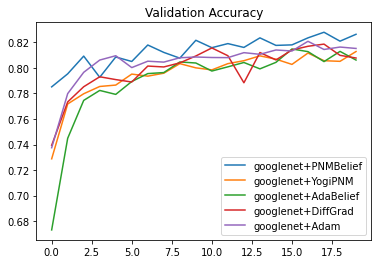

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

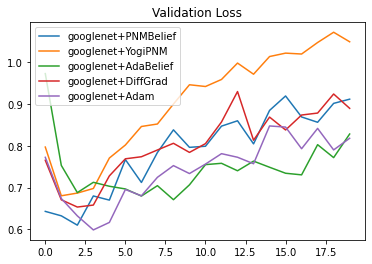

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D